# Calcul de la constante de Lifschitz

In [1]:
# importation
import numpy as np
from torch.autograd import Variable
import torch
import matplotlib.pyplot as plt
%matplotlib inline
# local
from FBResNet.myfunc import Physics
from FBResNet.myfunc import MyMatmul
from FBResNet.main import FBRestNet
from FBResNet.model import MyModel
from FBResNet.posttreat import Export_hyper

### Parametres

In [2]:
exp1 = FBRestNet(experimentation=Physics(2000,50,1,1), nb_blocks=20, noise = 0.05,\
                 folder = './', im_set="Set1",batch_size=[300,1],\
                 lr=1e-3, nb_epochs=[20,1])

### Data set
On entraine sur 300 données et on évalue sur 100.

In [3]:
train_set, val_set = exp1.CreateDataSet()
train_set, val_set = exp1.LoadDataSet()

### Trainings
Entrainement sur 20 époques, learning rate de $10^{-3}$.
On trace la constante de Lipschitz au cours de l' entrainement.

epoch :  0  -----  validation :  0.0034555226301002983
           ----- initial error : 0.6192713696697746
epoch :  1  -----  validation :  0.002772213133273063
           ----- initial error : 0.6192713696697746
epoch :  2  -----  validation :  0.0019154685400685088
           ----- initial error : 0.6192713696697746
epoch :  3  -----  validation :  0.0012370613923959547
           ----- initial error : 0.6192713696697746
epoch :  4  -----  validation :  0.0010737345738111846
           ----- initial error : 0.6192713696697746
epoch :  5  -----  validation :  0.001067551371913093
           ----- initial error : 0.6192713696697746
epoch :  6  -----  validation :  0.0010630991610473804
           ----- initial error : 0.6192713696697746
epoch :  7  -----  validation :  0.0010602607090741095
           ----- initial error : 0.6192713696697746
epoch :  8  -----  validation :  0.0010574206655769788
           ----- initial error : 0.6192713696697746
epoch :  9  -----  validation :  0.0010

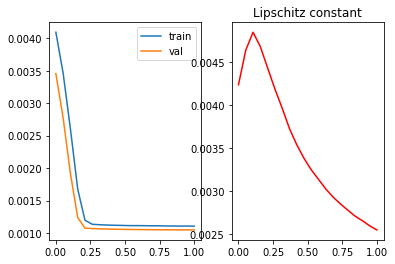

Final Lipschitz constant =  0.0025531203157444535


In [4]:
exp1.train(train_set,val_set,save_model=True)

### Affichage de résultats

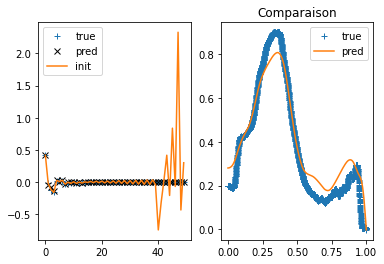

Erreur de sortir :  0.200050350052445
Erreur initiale :  103.77402339122112


In [5]:
err = exp1.test(train_set)

### Test with gaussian

<class 'str'>
x-xp/x = 0.1422061054025926


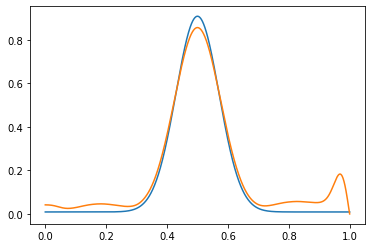

In [6]:
exp1.test_gauss(noise=0.05)

### Lipschitz constant

In [7]:
exp1.model.Lipschitz(opt1="semi",opt2="entree11")

0.04972511477193405

In [8]:
exp1.model.Lipschitz(opt1="total",opt2="entree11")

1.2354013460495843

In [9]:
exp1.model.Lipschitz(opt1="semi",opt2="entree01")

0.0025639139826007335

In [10]:
exp1.model.Lipschitz(opt1="total",opt2="entree01")

0.5129407791456656

### TEST ON OTHER FUNCTIONS